<a href="https://colab.research.google.com/github/jieying1108/testing/blob/main/Version_3_(deployment)_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ONLINE PAYMENT FRAUD DETECTION
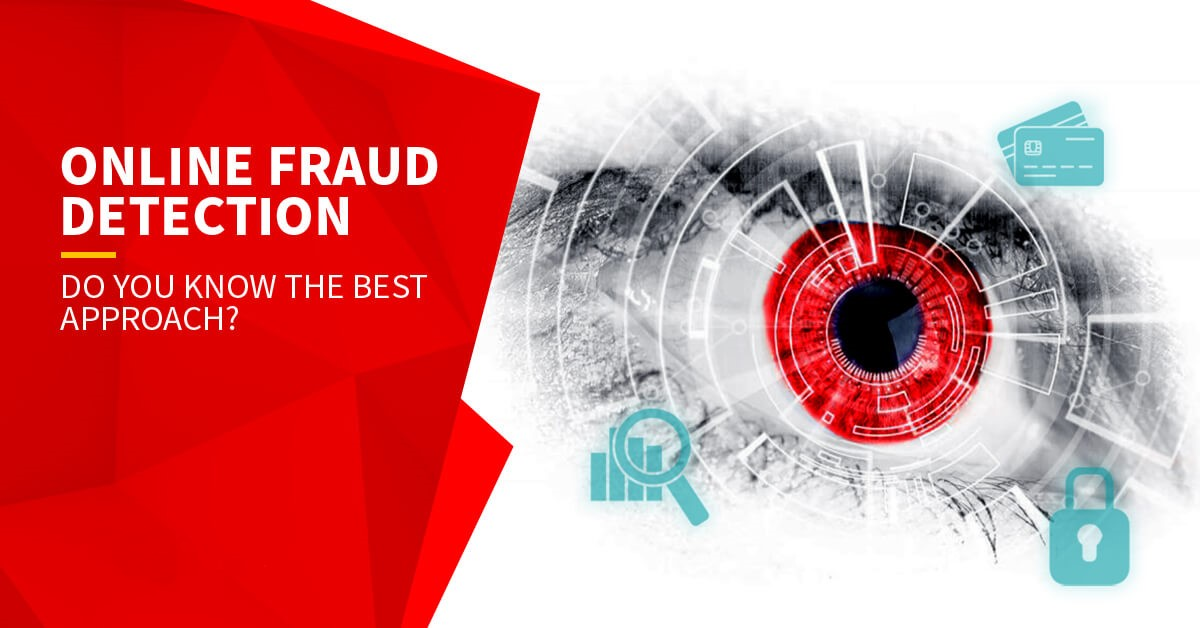

##GROUP 11

1. Khoo Han Liang	S2185579

2. Chong Qi Xuan	22120948

3. Tan Jie Ying	22114504

4. Chan Tzyy Yan	17153472

5. Ow Yu Wei	22115273


#Importing Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount('/content/onlinefraud.csv')

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

#Load data from Google Drive file
data = pd.read_csv('/content/drive/MyDrive/Dataset/onlinefraud.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Exploring

In [ ]:
#Explore the data size
data.shape

(6362620, 11)

The dataset has 6362620 rows and 11 columns
* step: represents a unit of time where 1 step equals 1 hour
* type: type of online transaction
* amount: the amount of the transaction
* nameOrig: customer starting the transaction
* oldbalanceOrg: balance before the transaction
* newbalanceOrig: balance after the transaction
* nameDest: recipient of the transaction
* oldbalanceDest: initial balance of recipient before the transaction
* newbalanceDest: the new balance of recipient after the transaction
* isFraud: fraud transaction (This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.)
* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [ ]:
#Display first ten rows of the dataset
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
#Get summary statistics of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#Create a copy of the original dataset for data pre-processing purpose
df = data.copy()

In [ ]:
#Check whether there is any null value
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There is no any missing value in the dataset.

In [ ]:
#Check whether there is any duplicate rows in the dataset
df.duplicated().sum()

0

There is no duplicate rows in the dataset.

In [ ]:
# Check if all customers starting the transaction are unique
unique_customers = df['nameOrig'].nunique()

# Get the total number of transactions
total_transactions = len(df)

# Check if all customers are unique
if unique_customers == total_transactions:
    print("All customers starting the transaction are unique.")
else:
    print("Not all customers starting the transaction are unique.")

Not all customers starting the transaction are unique.


In [ ]:
# Check if all recipients of the transactions are unique
unique_recipients = df['nameDest'].nunique()

# Check if all recipients are unique
if unique_recipients == total_transactions:
    print("All recipients of the transactions are unique.")
else:
    print("Not all recipients of the transactions are unique.")

Not all recipients of the transactions are unique.


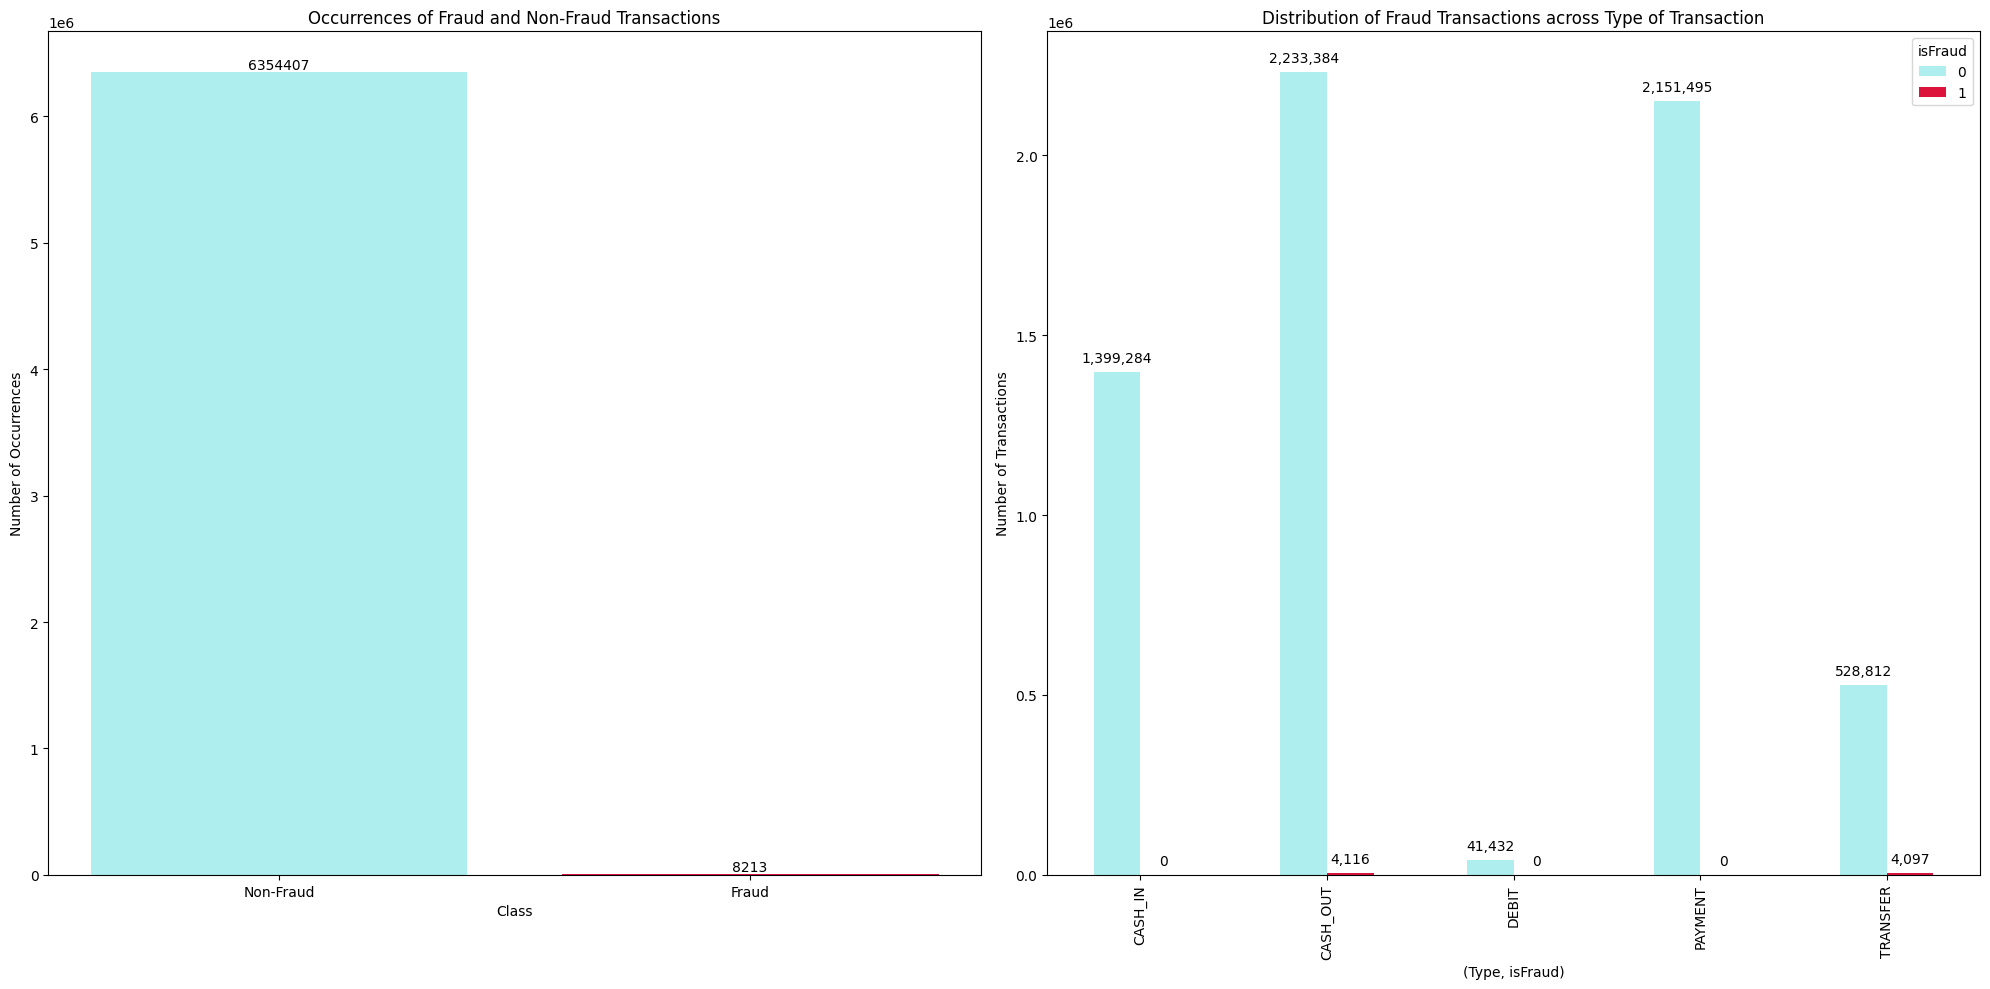

From the Occurrences of Fraud and Non-Fraud Transactions summarize as below
Non-Fraud =  6354407
Fraud =  8213


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# First subplot: Occurrences of Fraud and Non-Fraud Transactions
fraud_counts = df['isFraud'].value_counts()
labels = ['Non-Fraud', 'Fraud']
values = fraud_counts.values
ax1 = axs[0]
colors = ['paleturquoise', 'crimson']
bars = ax1.bar(labels, values, color=colors)
ax1.set_xlabel('Class')
ax1.set_ylabel('Number of Occurrences')
ax1.set_title('Occurrences of Fraud and Non-Fraud Transactions')
for bar, value in zip(bars, values):
    ax1.text(bar.get_x() + bar.get_width()/2, value, str(value), ha='center', va='bottom')

# Distribution of Fraud Transactions across Type of Transaction
fraud_type_counts = df.groupby(['type', 'isFraud']).size().unstack().fillna(0)

# Custom colors for the second subplot
colors = ['paleturquoise', 'crimson']  # Colors for Non-Fraud and Fraud bars

# Plotting with custom colors
ax2 = fraud_type_counts.plot(kind='bar', stacked=False, color=colors, ax=axs[1])
ax2.set_title("Distribution of Fraud Transactions across Type of Transaction")
ax2.set_xlabel("(Type, isFraud)")
ax2.set_ylabel("Number of Transactions")

# Adding annotations to each bar
for p in ax2.patches:
    ax2.annotate(str(format(int(p.get_height()), ',d')),
                 (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10),
                 textcoords='offset points')

# Show the plots
plt.tight_layout()
plt.show()

print("From the Occurrences of Fraud and Non-Fraud Transactions summarize as below")
print("Non-Fraud = ", fraud_counts[0])
print("Fraud = ", fraud_counts[1])

From above plot, it showed that the dataset is imbalanced.

In [ ]:
# Exploring transaction type
print(df.type.value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [ ]:
fraud_transactions = df[df["isFraud"] == 1]
fraud_counts_by_type = fraud_transactions.groupby("type").size()
print(fraud_counts_by_type)

type
CASH_OUT    4116
TRANSFER    4097
dtype: int64


From above, all the fraud transaction is come from "CASH_OUT" and "TRANSFER".

In [ ]:
# Group the data by initiator and count the occurrences of each initiator
fraud_transactions_per_initiator = fraud_transactions.groupby('nameOrig').size()

# Check if any initiator has more than one fraud transaction
if (fraud_transactions_per_initiator > 1).any():
    print("There are fraud transactions coming from the same person.")
else:
    print("There are no fraud transactions coming from the same person.")

There are no fraud transactions coming from the same person.


In [ ]:
# Group the data by recipient and count the occurrences of each recipient
fraud_transactions_per_recipient = fraud_transactions.groupby('nameDest').size()

# Check if any recipient has more than one fraud transaction
if (fraud_transactions_per_recipient > 1).any():
    print("There are fraud transactions to the same recipient.")
else:
    print("There are no fraud transactions to the same recipient.")

There are fraud transactions to the same recipient.


#Data Modify

Re-label the type as below
*   1 - CASH_OUT
*   2 - PAYMENT
*   3 - CASH_IN
*   4 - TRANSFER
*   5 - DEBIT


In [ ]:
# Transform the categorical features into numerical
# Convert the "type" column from categorical labels to numerical values
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# Filter rows with transaction types "CASH_OUT" and "TRANSFER"
df_filtered = df[df['type'].isin([1, 4])]

# Check the size of data after dropping other transaction types except "CASH_OUT" and "TRANSFER"
df_filtered.shape

(2770409, 11)

In [ ]:
# Feature Selection
# Separate features (X) and target variable (y)
X = df_filtered.drop(columns=['step','isFraud','isFlaggedFraud','nameOrig','nameDest'])
y = df_filtered['isFraud']

##Data splitting

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

##Feature Scaling

In [ ]:
# from imblearn.over_sampling import SMOTE
# Initialize SMOTE
# smote = SMOTE(random_state=45)

# Perform SMOTE on the training data
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Feature Scaling
# Define the columns to be scaled
columns_to_scale = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Standard Scaler
# Scaling features to have a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_standard = StandardScaler()

# Perform feature scaling on the specified columns of the training data
X_train_scaled_standard = X_train.copy()
X_train_scaled_standard[columns_to_scale] = scaler_standard.fit_transform(X_train_scaled_standard[columns_to_scale])

# Apply feature scaling on the specified columns to the test set
# Use transform (not fit_transform) to apply scaling learned from training set
X_test_scaled_standard = X_test.copy()
X_test_scaled_standard[columns_to_scale] = scaler_standard.transform(X_test_scaled_standard[columns_to_scale])

In [ ]:
print(X_train_scaled_standard.shape)
print(X_test_scaled_standard.shape)

(2216327, 6)
(554082, 6)


In [ ]:
# Feature Scaling
# Define the columns to be scaled
# columns_to_scale = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Min Max Scaler
# Scaling features to a fixed range, typically [0, 1]
#from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
# scaler_minmax = MinMaxScaler()

# Perform feature scaling on the specified columns of the training data
# X_train_scaled_minmax = X_train_resampled.copy()
# X_train_scaled_minmax[columns_to_scale] = scaler_minmax.fit_transform(X_train_scaled_minmax[columns_to_scale])

# Apply feature scaling to the test set
# Use transform (not fit_transform) to apply scaling learned from training set
# X_test_scaled_minmax = X_test.copy()
# X_test_scaled_minmax[columns_to_scale] = scaler_minmax.transform(X_test_scaled_minmax[columns_to_scale])

In [ ]:
# print(X_train_scaled_minmax.shape)
# print(X_test_scaled_minmax.shape)

In [ ]:
##Ensure DataFrame Integrity After Scaling
##from sklearn.preprocessing import MinMaxScaler, StandardScaler
##import pandas as pd

# Assuming columns_to_scale and indices are maintained
##scaler_minmax = MinMaxScaler()
##X_train_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(X_train_resampled[columns_to_scale]), columns=columns_to_scale, index=X_train_resampled.index)
##X_test_scaled_minmax = pd.DataFrame(scaler_minmax.transform(X_test[columns_to_scale]), columns=columns_to_scale, index=X_test.index)

##scaler_standard = StandardScaler()
##X_train_scaled_standard = pd.DataFrame(scaler_standard.fit_transform(X_train_resampled[columns_to_scale]), columns=columns_to_scale, index=X_train_resampled.index)
##X_test_scaled_standard = pd.DataFrame(scaler_standard.transform(X_test[columns_to_scale]), columns=columns_to_scale, index=X_test.index)

#Exploratory Data Analysis

In [ ]:
# Get the count of each type
type_counts = data['type'].value_counts()
transactions = type_counts.index
quantity = type_counts.values

# Define your custom colors
colors = ['mistyrose', 'lemonchiffon', 'lightcyan', 'honeydew', 'lavender']

# Create the pie chart with custom colors
figure = px.pie(data, values=quantity, names=transactions, hole=0.5,
                title="Distribution of Transaction Type",
                color_discrete_sequence=colors)  # Apply custom colors here

# Update layout to center the title
figure.update_layout(
    title={
        'text': "Distribution of Transaction Type",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=20, family='Helvetica', color='slategrey')
)

# Show the plot
figure.show()

In [ ]:
# Group by 'type' and calculate mean amount and fraud percentage
stats_by_type = data.groupby('type').agg({'amount': 'mean', 'isFraud': 'mean'})

print("Mean amount and fraud percentage by type:")
print()
print(stats_by_type*100)

Mean amount and fraud percentage by type:

                amount   isFraud
type                            
CASH_IN   1.689202e+07  0.000000
CASH_OUT  1.762740e+07  0.183955
DEBIT     5.483665e+05  0.000000
PAYMENT   1.305760e+06  0.000000
TRANSFER  9.106470e+07  0.768799


In [ ]:
# Separate fraud and non-fraud data
fraud_data = data[data['isFraud'] == 1]
non_fraud_data = data[data['isFraud'] == 0]

# Calculate the mean amount for fraud and non-fraud transactions by type
fraud_mean_amount_by_type = fraud_data.groupby('type')['amount'].mean()
non_fraud_mean_amount_by_type = non_fraud_data.groupby('type')['amount'].mean()

# Calculate the fraud percentage by type
fraud_percentage_by_type = stats_by_type['isFraud'] * 100

# Concatenate the results into a single DataFrame
result_by_type = pd.concat([fraud_mean_amount_by_type, non_fraud_mean_amount_by_type, fraud_percentage_by_type],
                           keys=["Fraudulent", "Non-Fraudulent", "Percent(%)"], axis=1, sort=False)

print("Mean amount and fraud percentage by type:")
print()
print(result_by_type)

Mean amount and fraud percentage by type:

            Fraudulent  Non-Fraudulent  Percent(%)
type                                              
CASH_OUT  1.455103e+06   173917.155751    0.183955
TRANSFER  1.480892e+06   906229.007812    0.768799
CASH_IN            NaN   168920.242004    0.000000
DEBIT              NaN     5483.665314    0.000000
PAYMENT            NaN    13057.604660    0.000000


#Data Modeling

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize Decision Tree Classifier
dt_classifier_standard = DecisionTreeClassifier(random_state=45)

# Train the Decision Tree Classifier
dt_classifier_standard.fit(X_train_scaled_standard, y_train)

# Make predictions on the test set
y_pred_dt_standard = dt_classifier_standard.predict(X_test_scaled_standard)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Metrics for Standard Scaling
accuracy_st = accuracy_score(y_test, y_pred_dt_standard)
precision_st = precision_score(y_test, y_pred_dt_standard, average='macro')
recall_st = recall_score(y_test, y_pred_dt_standard, average='macro')
f1_st = f1_score(y_test, y_pred_dt_standard, average='macro')
roc_auc_st = roc_auc_score(y_test, dt_classifier_standard.predict_proba(X_test_scaled_standard)[:, 1])

metrics_dts = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Value_DT': [accuracy_st, precision_st, recall_st, f1_st, roc_auc_st]
})
metrics_dts

,Metric,Value_DT
0,Accuracy,0.999390
1,Precision,0.947741
2,Recall,0.946066
3,F1 Score,0.946902
4,ROC AUC,0.946066


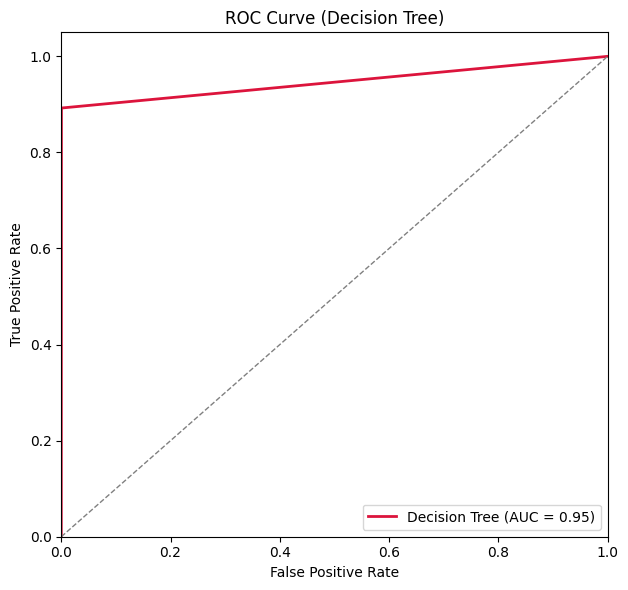

In [ ]:
# Compute ROC curve and AUC for Decision Tree Classifier (Standard scaling)
fpr_dt_standard, tpr_dt_standard, _ = roc_curve(y_test, dt_classifier_standard.predict_proba(X_test_scaled_standard)[:,1])
roc_auc_dt_standard = auc(fpr_dt_standard, tpr_dt_standard)

# Plot ROC curves side by side
plt.figure(figsize=(12, 6))

# Plot ROC curve and AUC for Decision Tree Classifier (Standard scaling)
plt.subplot(1, 2, 2)
plt.plot(fpr_dt_standard, tpr_dt_standard, color='crimson', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt_standard)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend(loc='lower right')

# Display the ROC curve and AUC curve
plt.tight_layout()
plt.show()

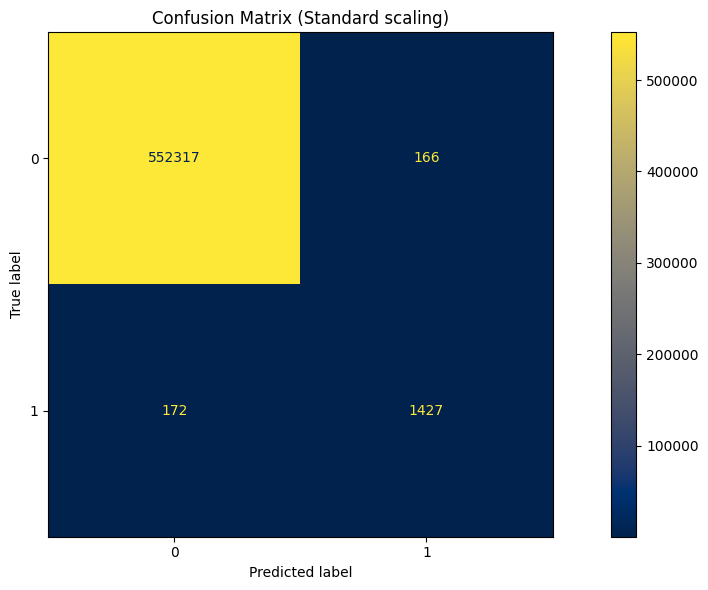

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrices for Decision Tree Classifier
cm_dt_standard = confusion_matrix(y_test, y_pred_dt_standard)

# Plot confusion matrix for Decision Tree Classifier (Standard scaling)
plt.figure(figsize=(12, 6))
plt.plot()
disp_dt_standard = ConfusionMatrixDisplay(confusion_matrix=cm_dt_standard, display_labels=dt_classifier_standard.classes_)
disp_dt_standard.plot(cmap=plt.cm.cividis, ax=plt.gca())
plt.title('Confusion Matrix (Standard scaling)')
plt.grid(False)

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Assuming X_train_scaled_standard, y_train, X_test_scaled_standard, and y_test are predefined.

# Building the model for Standard Scaling
model_standard = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled_standard.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compiling the model with additional metrics
model_standard.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

# Training the model
history_standard = model_standard.fit(X_train_scaled_standard, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluating the model
evaluation_standard = model_standard.evaluate(X_test_scaled_standard, y_test)

# Predictions to calculate further metrics
y_pred_probs = model_standard.predict(X_test_scaled_standard)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculating additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_probs)

# Initial ANN metrics dictionary
metrics_data_ann = {
    'Model': ['ANN'],
    'Accuracy': [evaluation_standard[1]],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'AUC ROC': [auc_roc]
}

# Create the new DataFrame format structured by metrics
metrics_ann = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Value_ANN': [
        metrics_data_ann['Accuracy'][0],
        metrics_data_ann['Precision'][0],
        metrics_data_ann['Recall'][0],
        metrics_data_ann['F1 Score'][0],
        metrics_data_ann['AUC ROC'][0]
    ]
})

metrics_ann

Epoch 1/5
55409/55409 [==============================] - 171s 3ms/step - loss: 0.0090 - accuracy: 0.9984 - precision: 0.8846 - recall: 0.5336 - val_loss: 0.0070 - val_accuracy: 0.9986 - val_precision: 0.8658 - val_recall: 0.6225
Epoch 2/5
55409/55409 [==============================] - 170s 3ms/step - loss: 0.0065 - accuracy: 0.9986 - precision: 0.9043 - recall: 0.6058 - val_loss: 0.0065 - val_accuracy: 0.9986 - val_precision: 0.9971 - val_recall: 0.5185
Epoch 3/5
55409/55409 [==============================] - 165s 3ms/step - loss: 0.0067 - accuracy: 0.9987 - precision: 0.9072 - recall: 0.6155 - val_loss: 0.0062 - val_accuracy: 0.9986 - val_precision: 0.9892 - val_recall: 0.5509
Epoch 4/5
55409/55409 [==============================] - 169s 3ms/step - loss: 0.0087 - accuracy: 0.9987 - precision: 0.9135 - recall: 0.6314 - val_loss: 0.0071 - val_accuracy: 0.9989 - val_precision: 0.9651 - val_recall: 0.6662
Epoch 5/5
17316/17316 [==============================] - 25s 1ms/step
      Metric  

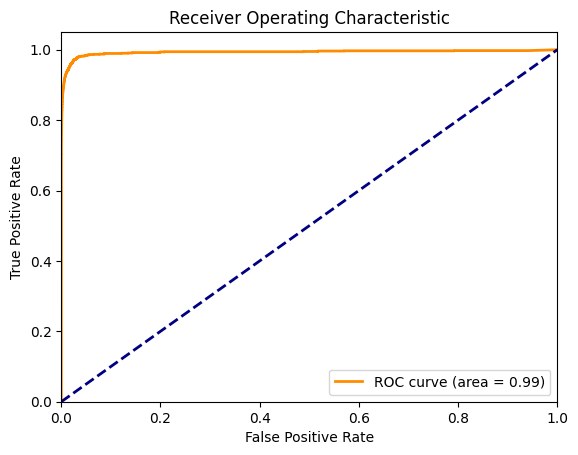

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred_probs are already defined as shown in your previous script

# 1. Generate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

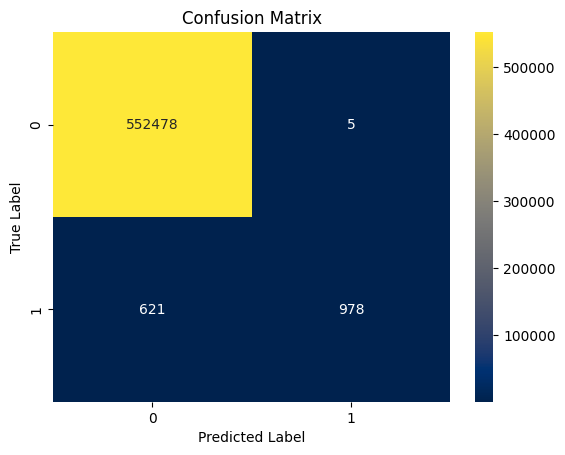

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Initialize XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=45, use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost Classifier
xgb_classifier.fit(X_train_scaled_standard, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test_scaled_standard)

# Metrics for Standard Scaling with XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')
roc_auc_xgb = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test_scaled_standard)[:, 1])

# DataFrame to display metrics
metrics_xgb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Value_XGBoost': [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb]
})

metrics_xgb


,Metric,Value_XGBoost
0,Accuracy,0.999188
1,Precision,0.964525
2,Recall,0.888595
3,F1 Score,0.923162
4,ROC AUC,0.998299


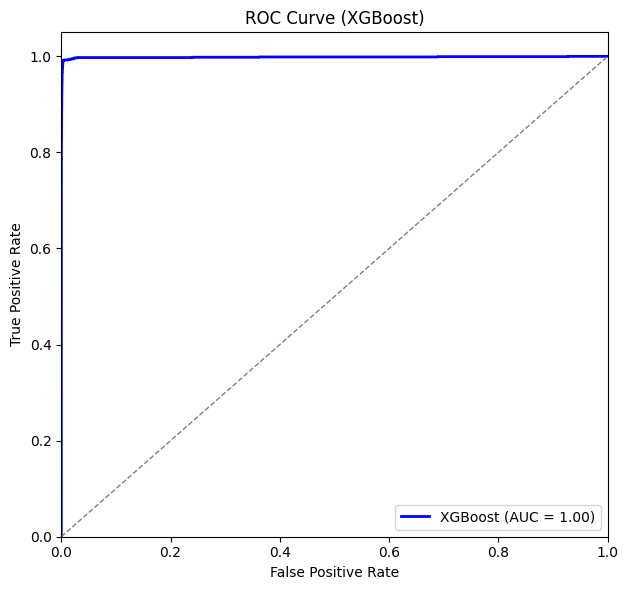

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for XGBoost Classifier
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_classifier.predict_proba(X_test_scaled_standard)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve and AUC for XGBoost Classifier
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend(loc='lower right')

# Display the ROC curve and AUC curve
plt.tight_layout()
plt.show()

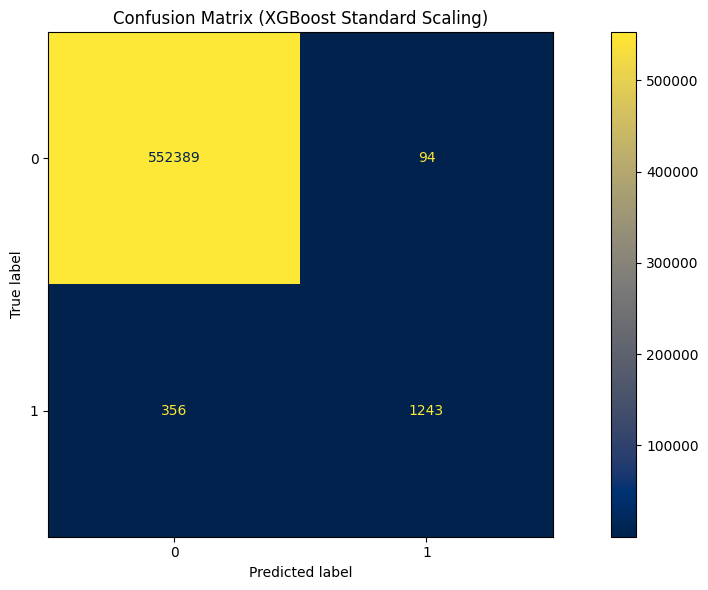

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Compute confusion matrix for XGBoost Classifier
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix for XGBoost Classifier
plt.figure(figsize=(12, 6))
plt.plot()
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_classifier.classes_)
disp_xgb.plot(cmap=plt.cm.cividis, ax=plt.gca())
plt.title('Confusion Matrix (XGBoost Standard Scaling)')
plt.grid(False)

plt.tight_layout()
plt.show()


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Initialize K-Nearest Neighbors Classifier
knn_classifier_standard = KNeighborsClassifier(n_neighbors=5)

# Train the KNN Classifier
knn_classifier_standard.fit(X_train_scaled_standard, y_train)

# Make predictions on the test set
y_pred_knn_standard = knn_classifier_standard.predict(X_test_scaled_standard)

# Metrics for Standard Scaling using KNN
accuracy_st = accuracy_score(y_test, y_pred_knn_standard)
precision_st = precision_score(y_test, y_pred_knn_standard, average='macro')
recall_st = recall_score(y_test, y_pred_knn_standard, average='macro')
f1_st = f1_score(y_test, y_pred_knn_standard, average='macro')
roc_auc_st = roc_auc_score(y_test, knn_classifier_standard.predict_proba(X_test_scaled_standard)[:, 1])

metrics_knn = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Value_KNN': [accuracy_st, precision_st, recall_st, f1_st, roc_auc_st]
})
metrics_knn

,Metric,Value_KNN
0,Accuracy,0.999105
1,Precision,0.955595
2,Recall,0.881694
3,F1 Score,0.915364
4,ROC AUC,0.944058


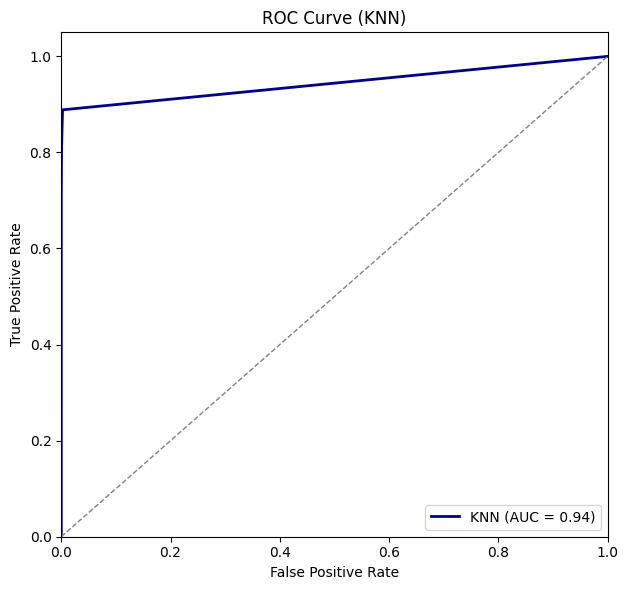

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'knn_classifier_standard' and necessary data are already defined and available from previous context

# Compute ROC curve and AUC for KNN Classifier (Standard scaling)
fpr_knn_standard, tpr_knn_standard, _ = roc_curve(y_test, knn_classifier_standard.predict_proba(X_test_scaled_standard)[:,1])
roc_auc_knn_standard = auc(fpr_knn_standard, tpr_knn_standard)


# Plot ROC curve and AUC for KNN Classifier (Standard scaling)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(fpr_knn_standard, tpr_knn_standard, color='darkblue', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn_standard)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (KNN)')
plt.legend(loc='lower right')

# Display the ROC curve and AUC curve
plt.tight_layout()
plt.show()


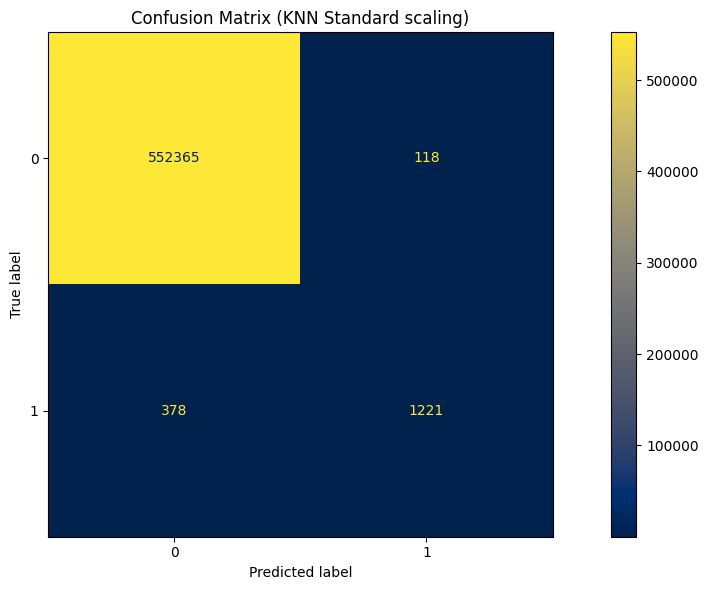

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'knn_classifier_standard', 'y_test', and 'y_pred_knn_standard' are already defined and available

# Compute confusion matrix for KNN Classifier
cm_knn_standard = confusion_matrix(y_test, y_pred_knn_standard)

# Plot confusion matrix for KNN Classifier (Standard scaling)
plt.figure(figsize=(12, 6))
plt.plot()
disp_knn_standard = ConfusionMatrixDisplay(confusion_matrix=cm_knn_standard, display_labels=knn_classifier_standard.classes_)
disp_knn_standard.plot(cmap=plt.cm.cividis, ax=plt.gca())
plt.title('Confusion Matrix (KNN Standard scaling)')
plt.grid(False)

plt.tight_layout()
plt.show()


##Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Initialize Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)

# Train the Logistic Regression Classifier
lr_classifier.fit(X_train_scaled_standard, y_train)

# Make predictions on the test set
y_pred_lr = lr_classifier.predict(X_test_scaled_standard)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Metrics for Logistics Regression using Standard Scaling
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
roc_auc_lr = roc_auc_score(y_test, lr_classifier.predict_proba(X_test_scaled_standard)[:, 1])

metrics_lr = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Value_LR': [accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr]
})

metrics_lr

,Metric,Value_LR
0,Accuracy,0.998181
1,Precision,0.933641
2,Recall,0.717541
3,F1 Score,0.789544
4,ROC AUC,0.978938


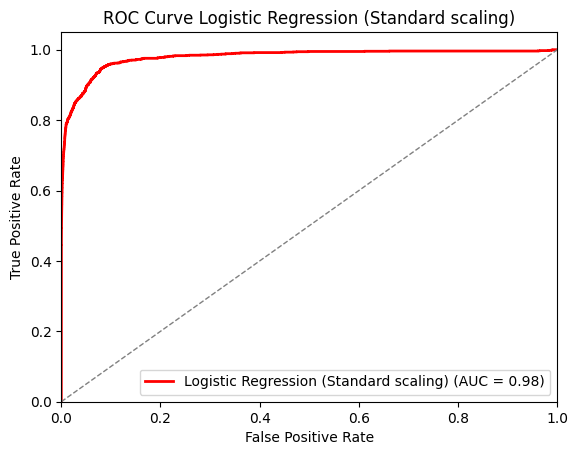

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_classifier.predict_proba(X_test_scaled_standard)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve and AUC for Logistic Regression Classifier (Standard scaling)
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='Logistic Regression (Standard scaling) (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression (Standard scaling)')
plt.legend(loc='lower right')
plt.show()

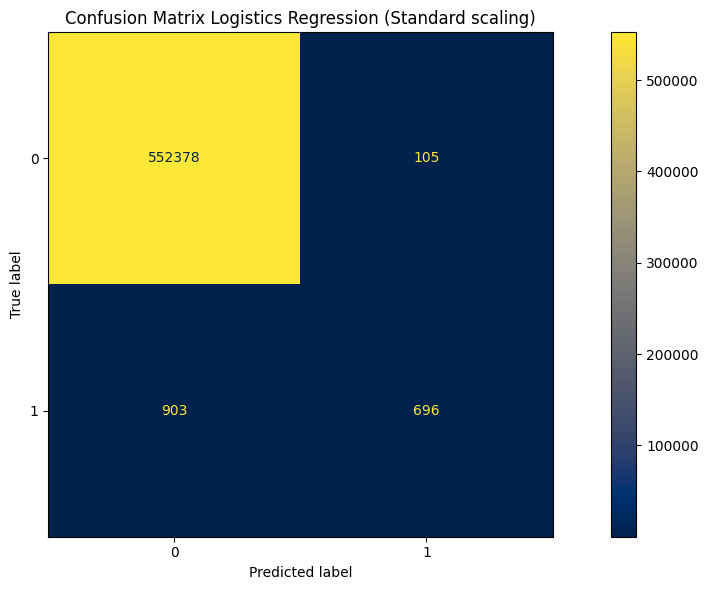

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrices for Logistic Regression Classifier  (Standard scaling)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix for Logistic Regression Classifier (Standard scaling)
plt.figure(figsize=(12, 6))
plt.plot()
disp_lr_standard = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_classifier.classes_)
disp_lr_standard.plot(cmap=plt.cm.cividis, ax=plt.gca())
plt.title('Confusion Matrix Logistics Regression (Standard scaling)')
plt.grid(False)

plt.tight_layout()
plt.show()

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize the SVM classifier
svm_classifier = SVC(random_state=45)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_scaled_standard, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test_scaled_standard)

# Evaluate the performance of the SVM classifier
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552483
           1       0.99      0.55      0.70      1599

    accuracy                           1.00    554082
   macro avg       0.99      0.77      0.85    554082
weighted avg       1.00      1.00      1.00    554082



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Metrics for Standard Scaling
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)


metrics_svm = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Value_SVM': [accuracy_svm, precision_svm, recall_svm, f1_svm, roc_auc_svm]
})

print(metrics_svm)

      Metric  Value_SVM
0   Accuracy   0.998672
1  Precision   0.994235
2     Recall   0.772662
3   F1 Score   0.851280
4    ROC AUC   0.772662


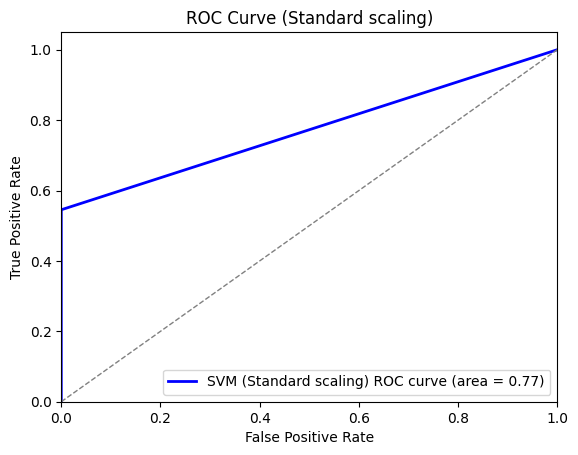

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='SVM (Standard scaling) ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Standard scaling)')
plt.legend(loc="lower right")
plt.show()

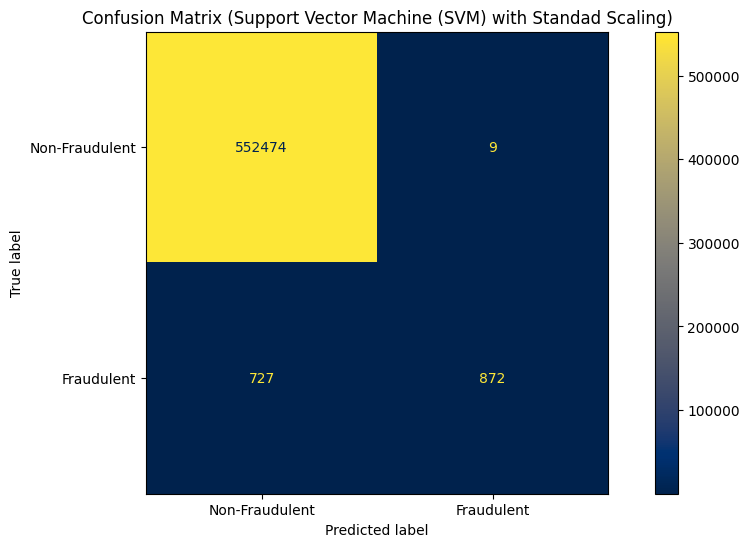

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(12, 6))

# Plot confusion matrix for SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Fraudulent', 'Fraudulent'])
disp_svm.plot(cmap=plt.cm.cividis, ax=plt.gca())
plt.title('Confusion Matrix (Support Vector Machine (SVM) with Standad Scaling)')
plt.grid(False)

plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=45)

# Train the Random Forest classifier on the scaled training data
rf_classifier.fit(X_train_scaled_standard, y_train)

# Predict on the scaled testing data
y_pred_rf = rf_classifier.predict(X_test_scaled_standard)

# Evaluate the performance of the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_rf)
print("\nClassification Report:\n", report_rf)

Random Forest Classifier Performance:
Accuracy: 0.9992636468970297

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552483
           1       0.97      0.77      0.86      1599

    accuracy                           1.00    554082
   macro avg       0.98      0.88      0.93    554082
weighted avg       1.00      1.00      1.00    554082



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train the Random Forest classifier on the scaled training data
rf_classifier.fit(X_train_scaled_standard, y_train)

# Predict on the scaled testing data
y_pred_rf = rf_classifier.predict(X_test_scaled_standard)

# Calculate different performance metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_rf)

# Print the performance metrics
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Random Forest Classifier Performance:
Accuracy: 0.9992636468970297
Precision: 0.9700078926598263
Recall: 0.7686053783614759
F1 Score: 0.8576413119330077
ROC AUC Score: 0.8842682989823066


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Metrics for Standard Scaling
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)


metrics_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Value_RF': [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]
})

print(metrics_rf)

      Metric  Value_RF
0   Accuracy  0.999264
1  Precision  0.984669
2     Recall  0.884268
3   F1 Score  0.928636
4    ROC AUC  0.884268


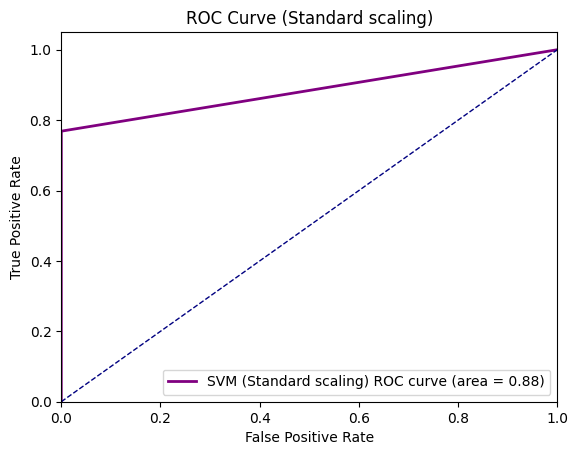

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, label='SVM (Standard scaling) ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Standard scaling)')
plt.legend(loc="lower right")
plt.show()

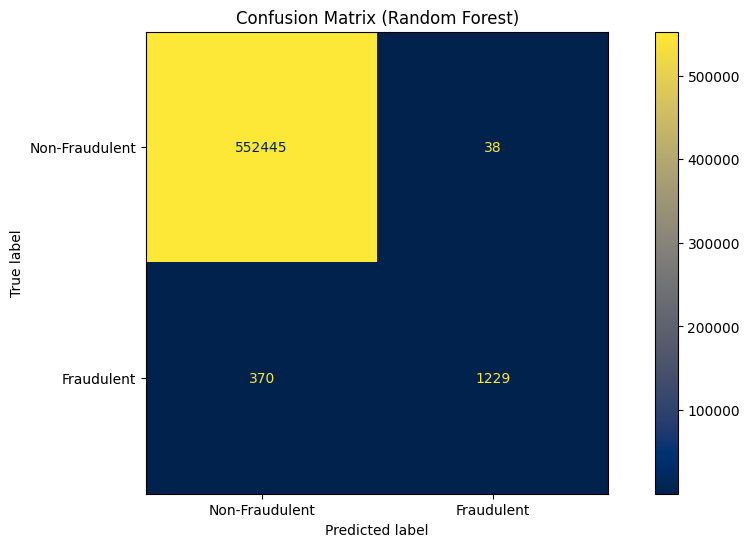

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(12, 6))

# Plot confusion matrix for RF
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Fraudulent', 'Fraudulent'])
disp_rf.plot(cmap=plt.cm.cividis, ax=plt.gca())
plt.title('Confusion Matrix (Random Forest)')
plt.grid(False)

plt.show()

In [ ]:
import time

# Start time
start_time = time.time()

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=45)

# Train the Random Forest classifier on the scaled training data
rf_classifier.fit(X_train_scaled_standard, y_train)

# Predict on the scaled testing data
y_pred_rf = rf_classifier.predict(X_test_scaled_standard)

# End time
end_time = time.time()

# Compute processing time
processing_time = end_time - start_time
print("Processing Time:", processing_time, "seconds")

Processing Time: 1142.2736036777496 seconds


In [ ]:
import psutil

# Compute memory usage
memory_usage_var = psutil.Process().memory_info().rss / 1024**2  # in MB
print("Memory Usage:", memory_usage_var, "MB")

Memory Usage: 3339.67578125 MB


#Model Assess


In [ ]:
import pandas as pd
from functools import reduce

data_frames = [metrics_dts, metrics_knn, metrics_lr, metrics_svm, metrics_rf]

def merge_dataframes(dfs):
    # Start with the first DataFrame as the initial merged DataFrame
    merged_df = dfs[0]
    # Iterate over the remaining DataFrames
    for df in dfs[1:]:
        # Merge while specifying unique suffixes for each DataFrame to avoid column name conflicts
        merged_df = pd.merge(merged_df, df, on='Metric', how='outer')
    return merged_df

# Call the function to merge all dataframes
metrics_all = merge_dataframes(data_frames)

def highlight_max(s):
    '''
    Highlight the maximum values in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: paleturquoise' if v else '' for v in is_max]

# Apply styling
styled_comparison_df = metrics_all.style.apply(highlight_max, subset=metrics_all.columns[1:], axis=1)

def count_max_highlights(df):
    # Calculate the count of max values in each metric column
    max_counts = (df.iloc[:, 1:] == df.iloc[:, 1:].max()).sum()
    best_column = max_counts.idxmax()
    return f"{best_column} has the best performance among all the other models."

# Calculate which model performs best
best_performance = count_max_highlights(metrics_all)
print(best_performance)

# Display styled DataFrame in a compatible environment (like Jupyter Notebook)
styled_comparison_df

Value_DT has the best performance among all the other models.


,Metric,Value_DT,Value_ANN,Value_XGBoost,Value_KNN,Value_LR,Value_SVM,Value_RF
0,Accuracy,0.999390,0.998895,0.999188,0.999105,0.998181,0.998672,0.999264
1,Precision,0.947741,0.950685,0.964525,0.955595,0.933641,0.994235,0.984669
2,Recall,0.946066,0.651032,0.888595,0.881694,0.717541,0.772662,0.884268
3,F1 Score,0.946902,0.772829,0.923162,0.915364,0.789544,0.851280,0.928636
4,ROC AUC,0.946066,0.992776,0.998299,0.944058,0.978938,0.772662,0.884268


Therefore, after comparing the performance of each models, Decision Tree has the best performance so it will be used in the following balancing technique comparison.

#Evaluation of balancing techniques using the best model

##Data balancing - SMOTE, ROS, RUS

###SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
#Initialize SMOTE
smote = SMOTE(random_state=45)

#Perform SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Checking the new class distribution
print("After SMOTE:")
print(pd.Series(y_train_smote).value_counts())

After SMOTE:
isFraud
0    2209713
1    2209713
Name: count, dtype: int64


###Random Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Create random over sampler object
ros = RandomOverSampler(random_state=45)

# Resample the dataset
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Checking the new class distribution
print("After over-sampling:")
print(pd.Series(y_train_ros).value_counts())

After over-sampling:
isFraud
0    2209713
1    2209713
Name: count, dtype: int64


###Random Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Create random under sampler object
rus = RandomUnderSampler(random_state=45)

# Resample the dataset
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Checking the new class distribution
print("After under-sampling:")
print(pd.Series(y_train_rus).value_counts())

After under-sampling:
isFraud
0    6614
1    6614
Name: count, dtype: int64


##Feature Scaling - SMOTE, ROS, RUS

In [39]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Standardization using SMOTE
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_smote_scaled = scaler.transform(X_test)  # Scale X_test with the same scaler

# Standardization using Random Over-Sampling
X_train_ros_scaled = scaler.fit_transform(X_train_ros)
X_test_ros_scaled = scaler.transform(X_test)  # Scale X_test with the same scaler

# Standardization using Random Under-Sampling
X_train_rus_scaled = scaler.fit_transform(X_train_rus)
X_test_rus_scaled = scaler.transform(X_test)  # Scale X_test with the same scaler

# Print shape to confirm operation
print("X_train_smote_scaled shape:", X_train_smote_scaled.shape)
print("X_train_ros_scaled shape:", X_train_ros_scaled.shape)
print("X_train_rus_scaled shape:", X_train_rus_scaled.shape)

X_train_smote_scaled shape: (4419426, 6)
X_train_ros_scaled shape: (4419426, 6)
X_train_rus_scaled shape: (13228, 6)


##Decision Tree

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def train_evaluate_xgboost(X_train, y_train, X_test, y_test):
    # Initialize the XGBoost classifier
    xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # Train the classifier
    xgb_classifier.fit(X_train, y_train)

    # Predict on test data
    y_pred = xgb_classifier.predict(X_test)
    y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Return the computed metrics
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

# Evaluate on sampling techniques
metrics_xgb_smote = train_evaluate_xgboost(X_train_smote_scaled, y_train_smote, X_test_smote_scaled, y_test)
metrics_xgb_ros = train_evaluate_xgboost(X_train_ros_scaled, y_train_ros, X_test_ros_scaled, y_test)
metrics_xgb_rus = train_evaluate_xgboost(X_train_rus_scaled, y_train_rus, X_test_rus_scaled, y_test)

# Create a DataFrame for each set of metrics
df_smote_xg = pd.DataFrame([metrics_smote], index=['SMOTE'])
df_ros_xg = pd.DataFrame([metrics_ros], index=['Random Over-Sampling'])
df_rus_xg = pd.DataFrame([metrics_rus], index=['Random Under-Sampling'])

# Combine the DataFrames into a single DataFrame for comparison
metrics_comparison_xg = pd.concat([df_smote_xg, df_ros_xg, df_rus_xg])

def highlight_max(data):
    '''
    Highlight the maximum values in each column in paleturquoise.
    '''
    # Find the maximum value in each column
    attr = data == data.max()
    # Apply the highlight to the maximum values; all other values get default coloring
    return ['background-color: paleturquoise' if attr.iloc[i] else '' for i in range(len(attr))]

# Apply the updated styling function to the DataFrame
styled_comparison_df_xg = metrics_comparison_xg.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'], axis=0)

def count_max_highlights(df):
    # Calculate the boolean DataFrame where True represents the maximum values in each column
    is_max = df == df.max()

    # Sum these booleans row-wise to count how many maximums each row has
    max_counts = is_max.sum(axis=1)

    # Determine which row has the most maximum values
    best_row = max_counts.idxmax()

    # Return the row name (index) that has the maximum count of max values
    return f"{best_row} has the best performance among the sampling techniques."

# Compute which row has the best performance based on maximum highlighted values
best_performance = count_max_highlights(metrics_comparison_xg.iloc[:, 1:])  # Exclude the first column if it's non-numeric
print(best_performance)

# Display styled DataFrame in a compatible environment
styled_comparison_df_xg

Random Over-Sampling has the best performance among the sampling techniques.


,Accuracy,Precision,Recall,F1 Score,ROC AUC
SMOTE,0.998784,0.707306,0.986867,0.824021,0.992842
Random Over-Sampling,0.999336,0.897353,0.869293,0.883100,0.934503
Random Under-Sampling,0.985462,0.164937,0.993746,0.282916,0.989592


In [ ]:
# Create a DataFrame for each set of metrics
df_smote_xg = pd.DataFrame([metrics_xgb_smote], index=['SMOTE'])
df_ros_xg = pd.DataFrame([metrics_xgb_ros], index=['Random Over-Sampling'])
df_rus_xg = pd.DataFrame([metrics_xgb_rus], index=['Random Under-Sampling'])

# Combine the DataFrames into a single DataFrame for comparison
metrics_comparison_xg = pd.concat([df_smote_xg, df_ros_xg, df_rus_xg])
metrics_transposed_xg = metrics_comparison.T

# Assuming accuracy_st, precision_st, recall_st, f1_st, roc_auc_st are defined
# Create the DataFrame for metrics from the decision tree
metrics_xgb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Before Sampling': [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb]
})

# Reformat metrics_dts to match the structure of metrics_transposed
metrics_xgb.set_index('Metric', inplace=True)

# Transpose metrics_dts to make it a column
metrics_xgb = metrics_xgb.rename(columns={'Value_DT': 'Before Sampling'})

# Combine with metrics_transposed
metrics_transposed_with_xgb = pd.concat([metrics_xgb, metrics_transposed_xg], axis=1)

# Define a new highlight function for the transposed DataFrame
def highlight_max_transposed(data):
    '''
    Highlight the maximum values in each row in paleturquoise.
    '''
    # Find the maximum value in each row
    attr = data.apply(lambda x: x == x.max(), axis=1)
    # Apply the highlight to the maximum values; all other values get default coloring
    return attr.applymap(lambda x: 'background-color: paleturquoise' if x else '')

# Apply the updated styling function to the transposed DataFrame
styled_transposed_df_xgb = metrics_transposed_with_xgb.style.apply(highlight_max_transposed, axis=None)

# Function to count which column has the most highlighted values
def count_max_highlights_transposed(df):
    # Calculate the boolean DataFrame where True represents the maximum values in each row
    is_max = df.apply(lambda x: x == x.max(), axis=1)

    # Sum these booleans column-wise to count how many maximums each column has
    max_counts = is_max.sum()

    # Determine which column has the most maximum values
    best_column = max_counts.idxmax()

    # Return the column name that has the maximum count of max values
    return f"{best_column} has the best performance among the sampling techniques."

# Compute which technique has the best performance based on maximum highlighted values
best_performance_transposed = count_max_highlights_transposed(metrics_transposed_with_xgb)
print(best_performance_transposed)

# Display styled DataFrame in a compatible environment (like Jupyter Notebook)
styled_transposed_df_xgb

Before Sampling has the best performance among the sampling techniques.


,Before Sampling,SMOTE,Random Over-Sampling,Random Under-Sampling
Accuracy,0.999188,0.998784,0.999336,0.985462
Precision,0.964525,0.707306,0.897353,0.164937
Recall,0.888595,0.986867,0.869293,0.993746
F1 Score,0.923162,0.824021,0.883100,0.282916
ROC AUC,0.998299,0.992842,0.934503,0.989592


## Decision Tree - Perform Data Balancing Techniques

### Decision Tree - SMOTE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Apply SMOTE to the training data
smote = SMOTE(random_state=45)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=45)
decision_tree.fit(X_train_smote_scaled, y_train_smote)

# Predict on the scaled test set
y_pred = decision_tree.predict(X_test_scaled)

# Calculate the probabilities for ROC AUC (if possible)
# Note: Decision Trees do not output probabilities by default like logistic regression or ensemble methods,
# so ROC AUC might be less meaningful unless probabilities are specifically configured to be output.
try:
    y_probs = decision_tree.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_probs)
except AttributeError:
    roc_auc = "Not available for Decision Tree without probability estimates"

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Accuracy: 0.9988268884388953
Precision: 0.8572871729873297
Recall: 0.9934877284467072
F1 Score: 0.9144038730363178
ROC AUC: 0.9934877284467072


### Decision Tree - ROS

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Apply Random Over Sampling to the training data
ros = RandomOverSampler(random_state=45)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train_ros_scaled = scaler.fit_transform(X_train_ros)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=45)
decision_tree.fit(X_train_ros_scaled, y_train_ros)

# Predict on the scaled test set
y_pred = decision_tree.predict(X_test_scaled)

# Calculate the probabilities for ROC AUC
try:
    y_probs = decision_tree.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_probs)
except AttributeError:
    roc_auc = "Not available for Decision Tree without probability estimates"

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Accuracy: 0.9993448623127985
Precision: 0.9473902478500915
Recall: 0.9376251876489274
F1 Score: 0.9424535146968077
ROC AUC: 0.9376251876489275


### Decision Tree - RUS

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Apply Random Under Sampling to the training data
rus = RandomUnderSampler(random_state=45)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train_rus_scaled = scaler.fit_transform(X_train_rus)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=45)
decision_tree.fit(X_train_rus_scaled, y_train_rus)

# Predict on the scaled test set
y_pred = decision_tree.predict(X_test_scaled)

# Calculate the probabilities for ROC AUC
try:
    y_probs = decision_tree.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_probs)
except AttributeError:
    roc_auc = "Not available for Decision Tree without probability estimates"

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Accuracy: 0.9855562895022758
Precision: 0.5828709011146835
Recall: 0.9893275484856208
F1 Score: 0.6384043365454626
ROC AUC: 0.9893275484856208


## Decision Tree - Evaluation

In [42]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming X_train, y_train, X_test, y_test are already defined

# Initialize scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Decision Tree classifier on original data
decision_tree = DecisionTreeClassifier(random_state=45)
decision_tree.fit(X_train_scaled, y_train)
y_pred = decision_tree.predict(X_test_scaled)

# Compute metrics for original dataset
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
try:
    y_probs = decision_tree.predict_proba(X_test_scaled)[:, 1]
    roc_auc = roc_auc_score(y_test, y_probs)
except AttributeError:
    roc_auc = "Not available"  # For Decision Trees without probability estimates

results = [['No Sampling', accuracy, precision, recall, f1, roc_auc]]

# Initialize samplers
smote = SMOTE(random_state=45)
ros = RandomOverSampler(random_state=45)
rus = RandomUnderSampler(random_state=45)

samplers = {'SMOTE': smote, 'Random Over-Sampling': ros, 'Random Under-Sampling': rus}

# Loop through each sampling technique
for name, sampler in samplers.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    X_resampled_scaled = scaler.fit_transform(X_resampled)
    X_test_scaled = scaler.transform(X_test)

    # Train the Decision Tree classifier
    decision_tree = DecisionTreeClassifier(random_state=45)
    decision_tree.fit(X_resampled_scaled, y_resampled)
    y_pred = decision_tree.predict(X_test_scaled)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    try:
        y_probs = decision_tree.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_probs)
    except AttributeError:
        roc_auc = "Not available"  # For Decision Trees without probability estimates

    results.append([name, accuracy, precision, recall, f1, roc_auc])

# Create a DataFrame
df = pd.DataFrame(results, columns=['Method', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Highlight the maximum values in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: paleturquoise' if v else '' for v in is_max]

styled_df = df.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
styled_df


,Method,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,No Sampling,0.999390,0.947741,0.946066,0.946902,0.946066
1,SMOTE,0.998827,0.857287,0.993488,0.914404,0.993488
2,Random Over-Sampling,0.999345,0.947390,0.937625,0.942454,0.937625
3,Random Under-Sampling,0.985556,0.582871,0.989328,0.638404,0.989328


Selected model will be decision tree + SMOTE where highest recell have higher ability to identify fraud transactions